In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import *

%matplotlib inline
sns.set_style('white')
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
filedir = 'C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray'
import os
for dirname, _, filenames in os.walk(filedir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\.DS_Store
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\test\.DS_Store
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\test\NORMAL\IM-0001-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\test\NORMAL\IM-0003-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\test\NORMAL\IM-0005-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\test\NORMAL\IM-0006-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\test\NORMAL\IM-0007-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\test\NORMAL\IM-00

C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\NORMAL\NORMAL2-IM-1412-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\NORMAL\NORMAL2-IM-1419-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\NORMAL\NORMAL2-IM-1422-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\NORMAL\NORMAL2-IM-1423-0001.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\.DS_Store
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
C:/Users/ahuva/OneDriv

C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person321_bacteria_1484.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person321_bacteria_1485.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person321_bacteria_1486.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person321_bacteria_1487.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person321_bacteria_1488.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person321_bacteria_1489.jpeg
C:/Users/ahuva/OneDrive - The City College of New York/Python Projects/archive/chest_xray/chest_xray\train\PNEUMONIA\person3

In [3]:
# Build dataset from Kaggle files
# data source: https://www.kaggle.com/code/shakhrulsiam/chest-xray-pneumonia-95-5-accuracy/notebook

from tensorflow.keras.utils import image_dataset_from_directory
train_data = image_dataset_from_directory(
    directory = filedir + '/train',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(200,200),
    shuffle=True,
    seed=101,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True,
    
)

test_data = image_dataset_from_directory(
    directory = filedir + '/test',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(200,200),
    shuffle=True,
    seed=101,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True,
    
)


val_data = image_dataset_from_directory(
    directory = filedir + '/val',
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(200,200),
    shuffle=True,
    seed=101,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=True,
    
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


Text(0.5, 1.0, 'Pneumonia')

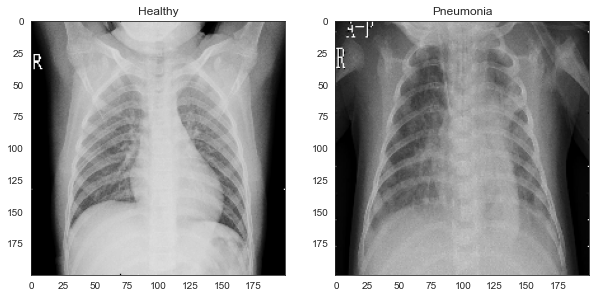

In [4]:
# Some visualization
from PIL import Image
import glob

normal = filedir + '/val/NORMAL/*.jpeg'
normal_list = []
for filename in glob.glob(normal):
    im = Image.open(filename).resize((200,200),resample=0)
    normal_list.append(im)

sick = filedir + '/val/PNEUMONIA/*.jpeg'
sick_list = []
for filename in glob.glob(sick):
    im  = Image.open(filename).resize((200,200),resample=0)
    sick_list.append(im)
    
fig, ax = plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(normal_list[0], cmap='gray',aspect=1)
ax[0].set_title('Healthy')
ax[1].imshow(sick_list[0],cmap='gray',aspect=1)
ax[1].set_title('Pneumonia')

In [5]:
import imageio
%matplotlib qt

plt.figure()
normals = []
for filename in glob.glob(normal):
    normals.append(imageio.imread(filename))
    
for i in range(len(normals)):
    plt.imshow(normals[i],cmap='gray')
    plt.title('Normal Lungs')
    plt.pause(0.01)
    
plt.show()

In [6]:
%matplotlib qt
sicks = []

plt.figure()
for filename in glob.glob(sick):
    sicks.append(imageio.imread(filename))
    
for i in range(len(sicks)):
    plt.imshow(sicks[i],cmap='gray')
    plt.title('Diseased Lungs')
    plt.pause(0.01)
    
plt.show()

In [7]:
model = keras.Sequential(
        [keras.Input(shape=(200,200,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(2, activation="softmax"),])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dropout (Dropout)           (None, 147456)            0

In [ ]:
batch_size = 128
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_data, batch_size=batch_size, epochs=epochs,validation_data=val_data)

Epoch 1/10
163/163 [==============================] - 227s 1s/step - loss: 22.8309 - accuracy: 0.8844 - val_loss: 0.2803 - val_accuracy: 0.8750
Epoch 2/10
 55/163 [=========>....................] - ETA: 3:09 - loss: 0.1903 - accuracy: 0.9278

In [ ]:
losses = pd.DataFrame(model.history.history)
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()

In [ ]:
score = model.evaluate(test_data,verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])